<a href="https://colab.research.google.com/github/Suryaa1309/Bike_Sharing_Demand_prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pandas.io.parsers.readers import read_csv
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv", delimiter= ',', encoding = "ISO-8859-1")

In [ ]:
dataset.columns=dataset.columns.str.replace(' ','_')
dataset.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility_(10m)', 'Dew_point_temperature(°C)',
       'Solar_Radiation_(MJ/m2)', 'Rainfall(mm)', 'Snowfall_(cm)', 'Seasons',
       'Holiday', 'Functioning_Day'],
      dtype='object')

In [ ]:
dataset.replace(np.NaN,0)
dataset

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
dataset.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented_Bike_Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind_speed_(m/s)           8760 non-null   float64
 6   Visibility_(10m)           8760 non-null   int64  
 7   Dew_point_temperature(°C)  8760 non-null   float64
 8   Solar_Radiation_(MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall_(cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning_Day            8760 non-null   objec

In [ ]:
len(dataset[dataset.duplicated()])

0

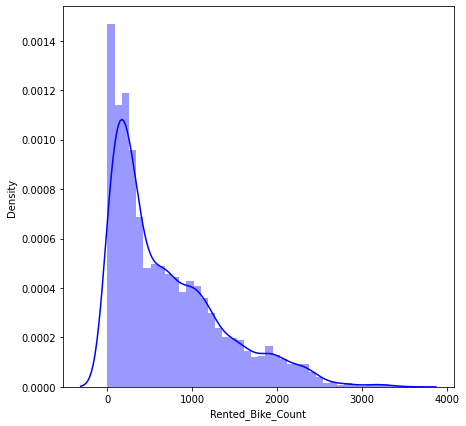

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(dataset['Rented_Bike_Count'],color="b")

In [ ]:
featres = dataset.describe().columns
featres

Index(['Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility_(10m)', 'Dew_point_temperature(°C)',
       'Solar_Radiation_(MJ/m2)', 'Rainfall(mm)', 'Snowfall_(cm)'],
      dtype='object')

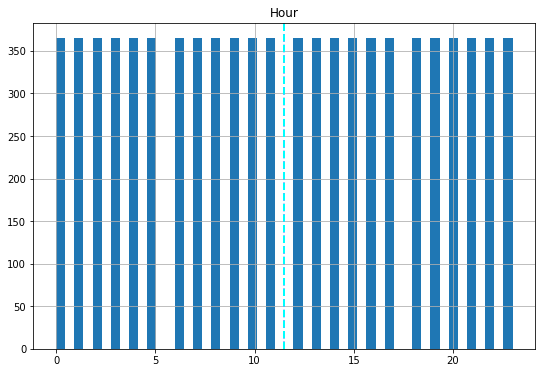

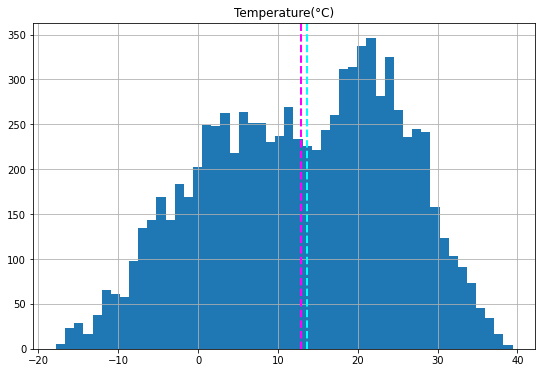

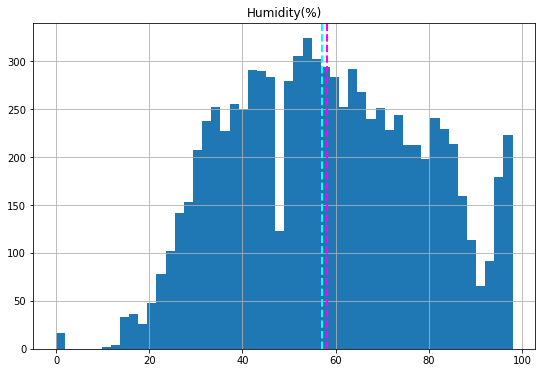

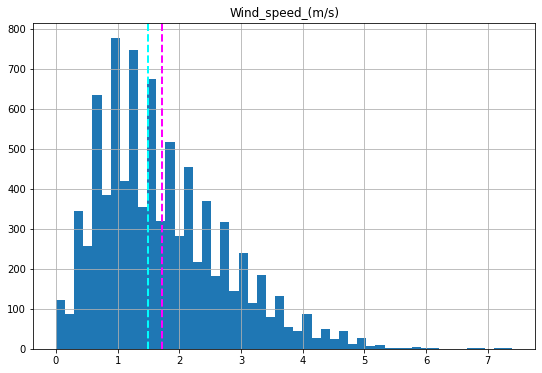

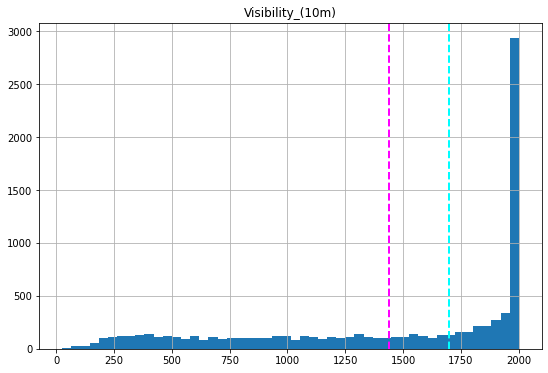

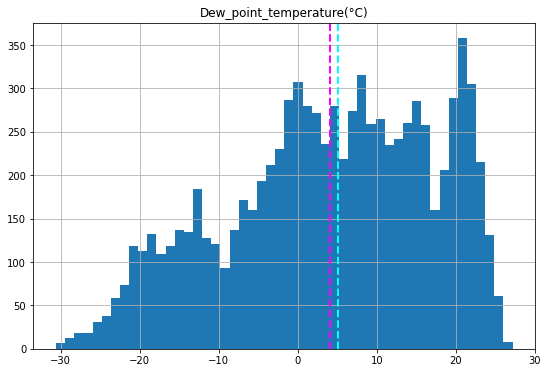

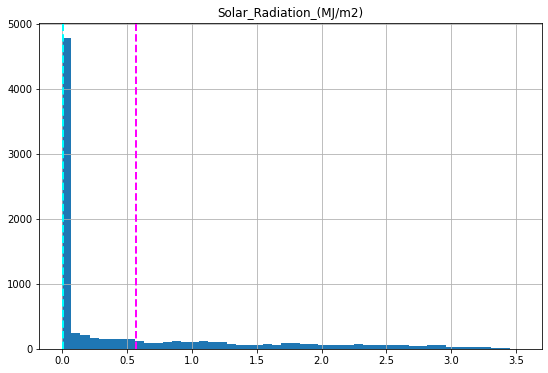

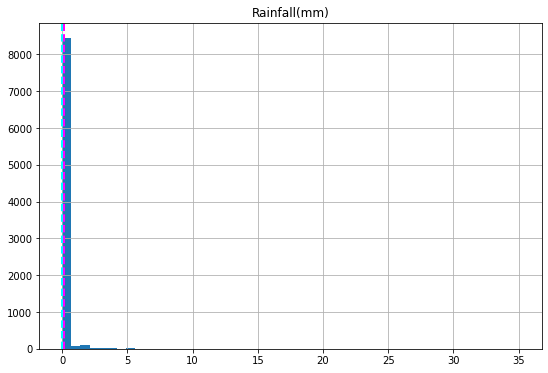

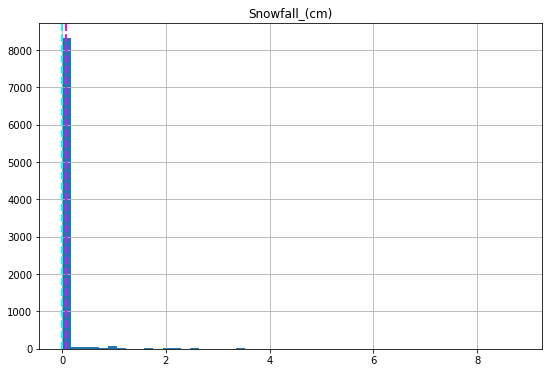

In [ ]:
for col in featres[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

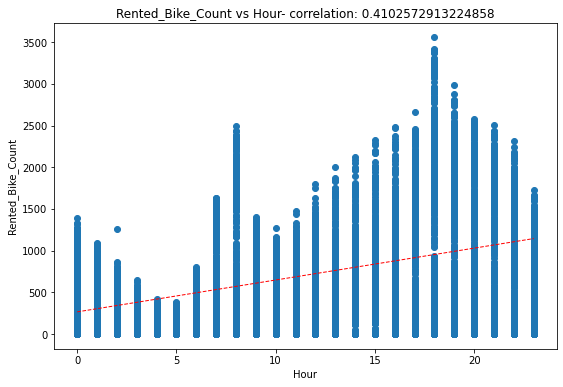

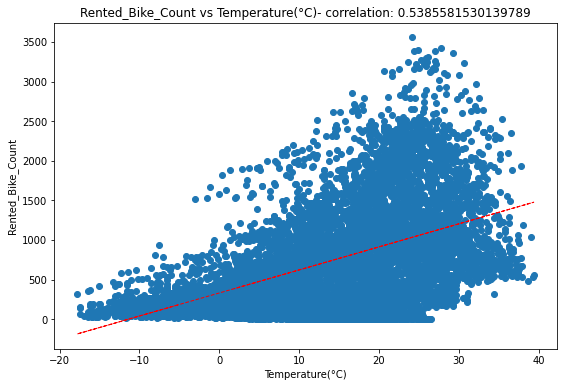

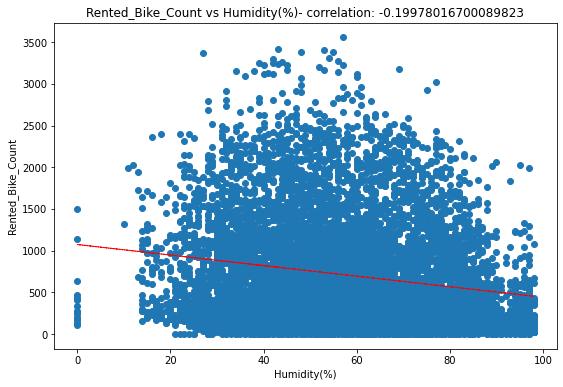

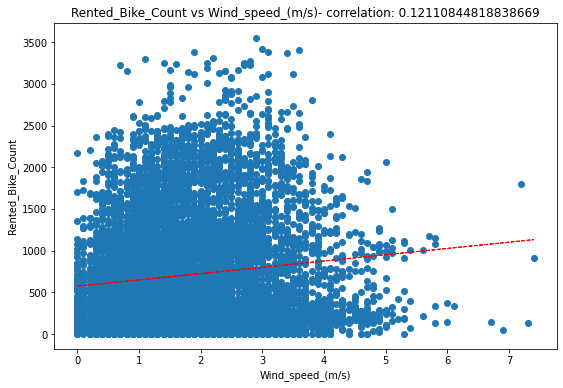

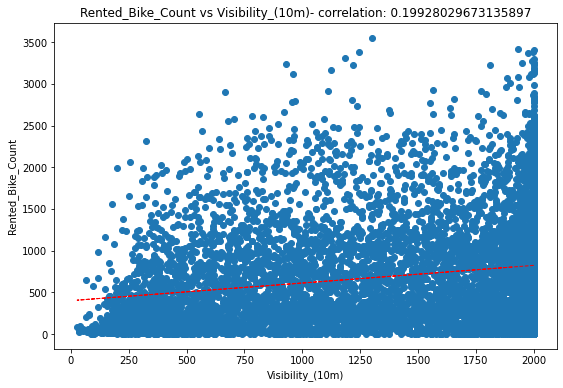

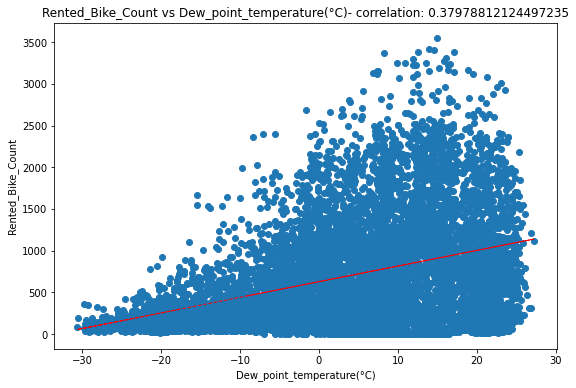

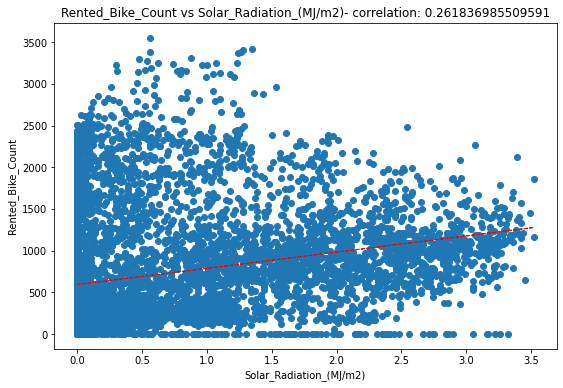

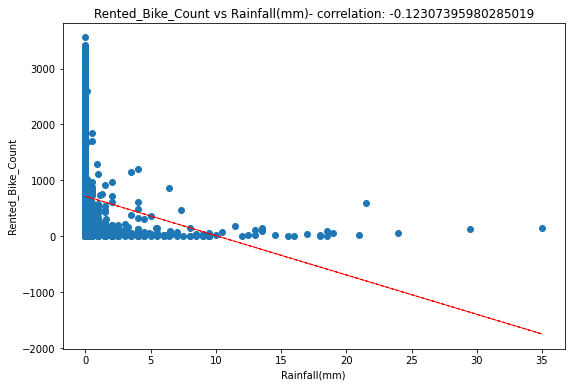

In [ ]:
for col in featres[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Rented_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented_Bike_Count')
    ax.set_title('Rented_Bike_Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

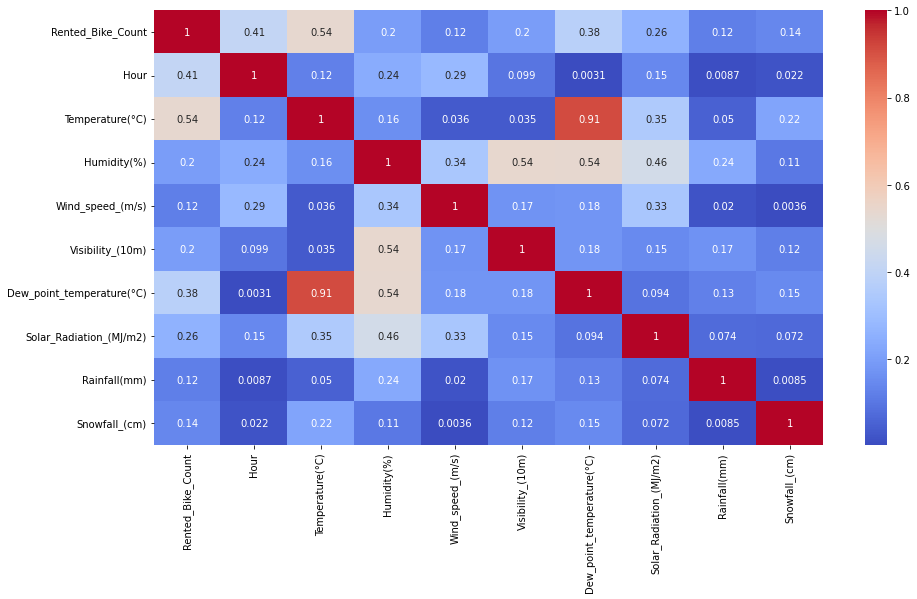

In [ ]:
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
dataset['all_temperature']=0.6*dataset['Dew_point_temperature(°C)']+0.4*dataset['Temperature(°C)']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):


    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Date','Rented_Bike_Count']]])


,variables,VIF
0,Hour,4.418242
1,Temperature(°C),inf
2,Humidity(%),5.371996
3,Wind_speed_(m/s),4.805364
4,Visibility_(10m),9.085977
5,Dew_point_temperature(°C),inf
6,Solar_Radiation_(MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall_(cm),1.120833
9,all_temperature,inf


In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Date','Rented_Bike_Count','Hour','Temperature(°C)','Humidity(%)','Wind_speed_(m/s)','Visibility_(10m)','Dew_point_temperature(°C)','all_temperature']]])

,variables,VIF
0,Solar_Radiation_(MJ/m2),1.001187
1,Rainfall(mm),1.001009
2,Snowfall_(cm),1.002015


In [ ]:
n_features=['Solar_Radiation_(MJ/m2)','Rainfall(mm)','Snowfall_(cm)']

In [ ]:
categorical_features = dataset.describe(include=['object','category']).columns

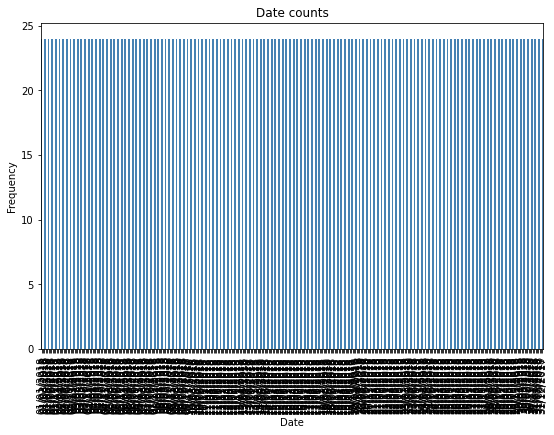

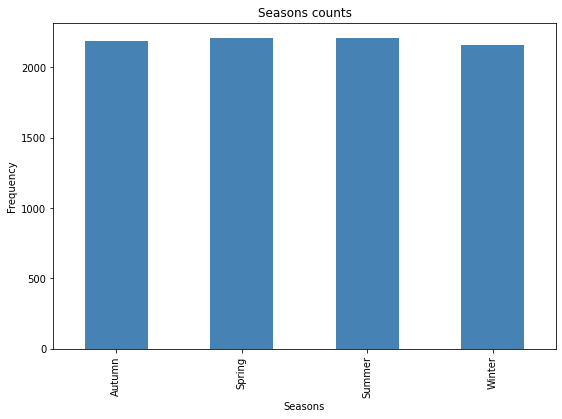

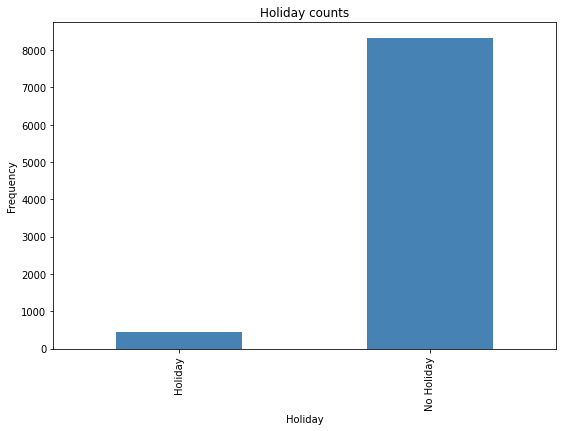

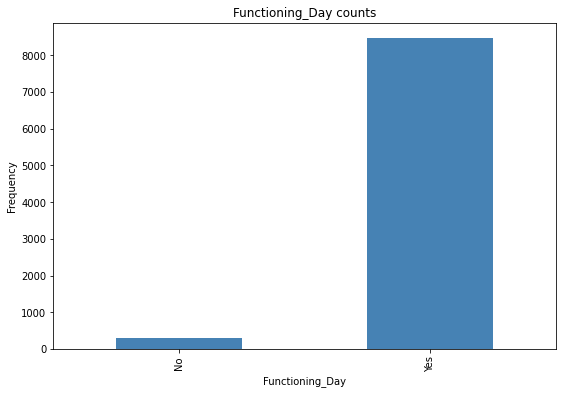

In [ ]:
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

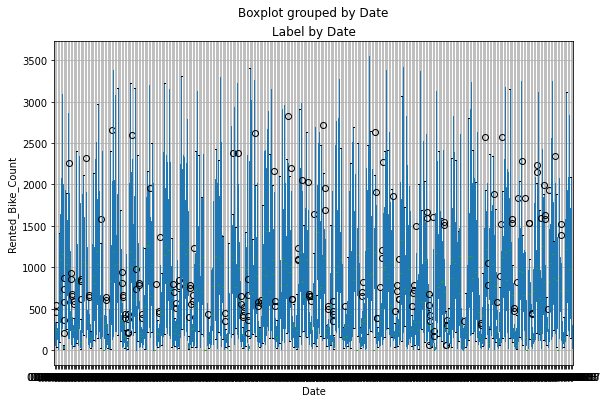

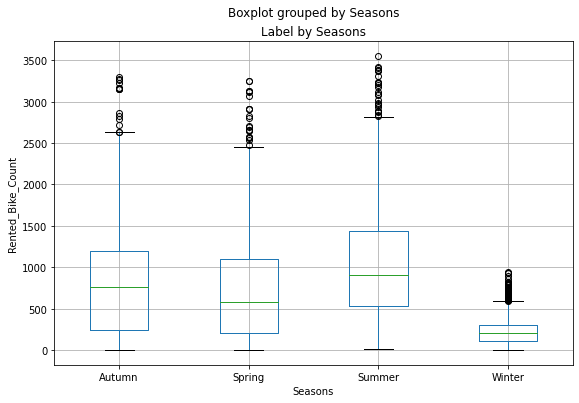

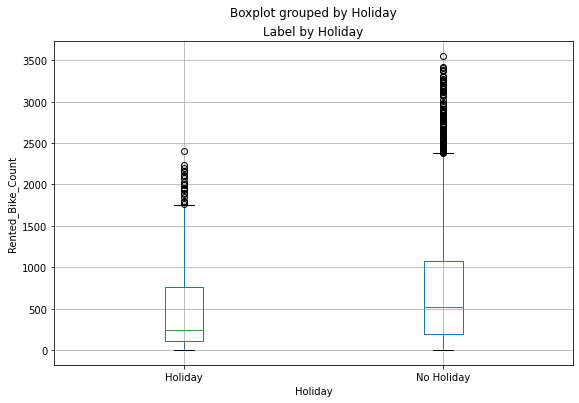

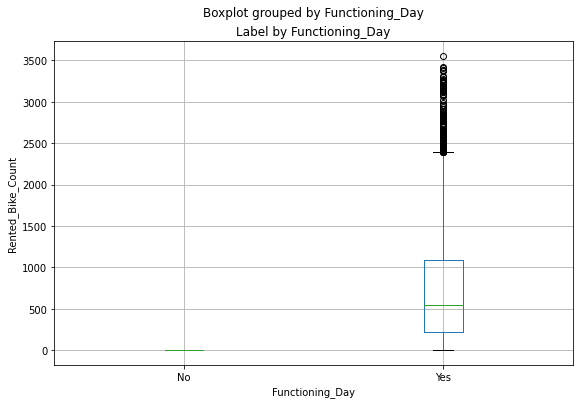

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Rented_Bike_Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented_Bike_Count")
plt.show()

In [ ]:
dataset_pr = dataset.copy()

In [ ]:
cat_to_num={"Functioning_Day":{'Yes':1,'No':0},
            "Seasons":{"Autumn":1,"Spring":2,"Summer":3,"Winter":4},
            "Holiday":{'Holiday':0,'No Holiday':1}
            }


dataset_pr = dataset_pr.replace(cat_to_num)            

In [ ]:
dataset_pr.drop(columns=['Date'],axis=1,inplace=True)
dataset_pr.head()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,all_temperature
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,1,1,-12.64
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,1,1,-12.76
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,1,1,-13.02
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,1,1,-13.04
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,1,1,-13.56


In [ ]:
dataset_pr=pd.get_dummies(dataset_pr,columns=['Functioning_Day','Seasons',"Holiday"],prefix=['fday','climate','H_day'])

In [ ]:
Ttl_features=n_features.copy()
Ttl_features.extend(['Functioning_Day','Seasons',"Holiday"])

In [ ]:
Ttl_features

['Solar_Radiation_(MJ/m2)',
 'Rainfall(mm)',
 'Snowfall_(cm)',
 'Functioning_Day',
 'Seasons',
 'Holiday']

In [ ]:
dataset_pr.head()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),all_temperature,fday_0,fday_1,climate_1,climate_2,climate_3,climate_4,H_day_0,H_day_1
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,-12.64,0,1,0,0,0,1,0,1
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,-12.76,0,1,0,0,0,1,0,1
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,-13.02,0,1,0,0,0,1,0,1
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,-13.04,0,1,0,0,0,1,0,1
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,-13.56,0,1,0,0,0,1,0,1


In [ ]:
len(Ttl_features)

6

In [ ]:
from scipy.stats import zscore
X = dataset_pr[featres].apply(zscore)

In [ ]:
y = (dataset_pr['Rented_Bike_Count'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(y_train.shape)

(7008, 10)
(7008,)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

1.0

In [ ]:
reg.coef_

array([ 6.44960652e+02,  1.29910706e-13,  3.51280750e-15,  7.00942711e-16,
       -7.62071185e-16,  8.62416205e-15,  2.40961507e-14, -1.13841937e-13,
       -9.38256135e-14,  9.16983928e-14])

In [ ]:
len(reg.coef_)

10

In [ ]:
reg.intercept_

704.6020547945204

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([ 320.,  580.,  226., ...,  213., 1331.,  783.])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test),(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1.4031079173449495e-25
RMSE : 3.745808213650226e-13


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test),(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 1.0
Adjusted R2 :  1.0


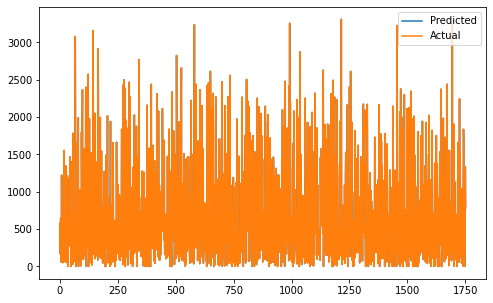

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()